<a href="https://colab.research.google.com/github/manishaachary13/AJIO-Product-Dissection-SQL-/blob/main/FedEx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT NAME**

**FedEx Logistics Performance Analysis**

Name - **R Manisha Achary**

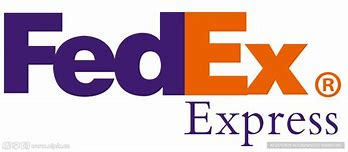

# **GitHub Link -**
https://github.com/manishaachary13/PaisaBazarFraudAnalysis/blob/a2034ff619e612ba1ee534a950bf572586a50b7c/PaisaBazar.ipynb

# Project Description

**Business Context**

FedEx Logistics manages a complex global supply chain, dealing with shipments across various regions, countries, and industries. This dataset provides an in-depth look at their logistics processes, capturing important information on purchase orders (POs), shipment methods, vendor agreements (INCO terms), delivery schedules, and product-specific details such as item descriptions and dosage forms. Effective management of these processes ensures timely delivery, minimizes freight costs, and improves customer satisfaction.

Given the rise of eCommerce and global distribution, companies like FedEx must continuously optimize their logistics operations to maintain a competitive edge. The dataset is designed to provide insights into how shipments are managed, identify bottlenecks or delays, and ensure cost-effectiveness. By analyzing the data, FedEx Logistics aims to streamline supply chain operations, improving delivery timelines and reducing costs for both the company and its customers.

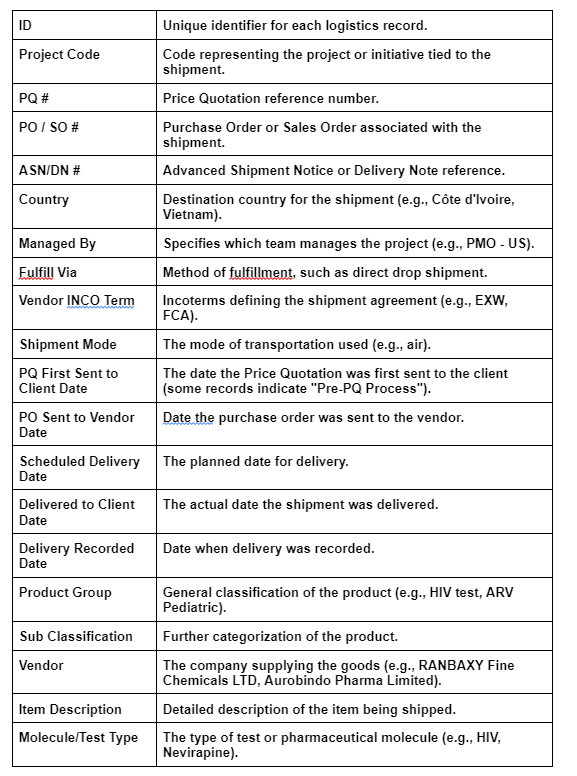

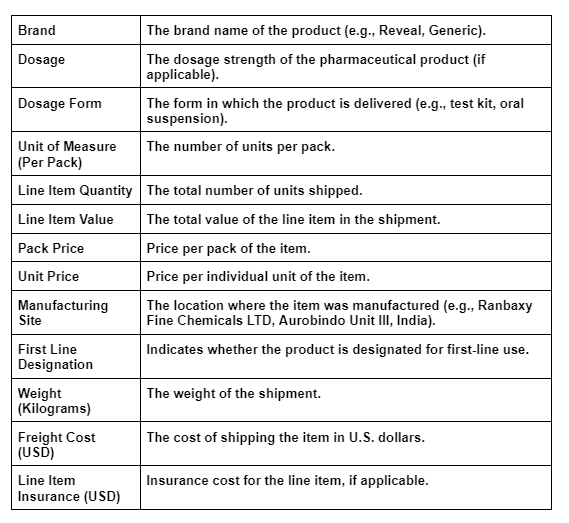

**Project Architecture**

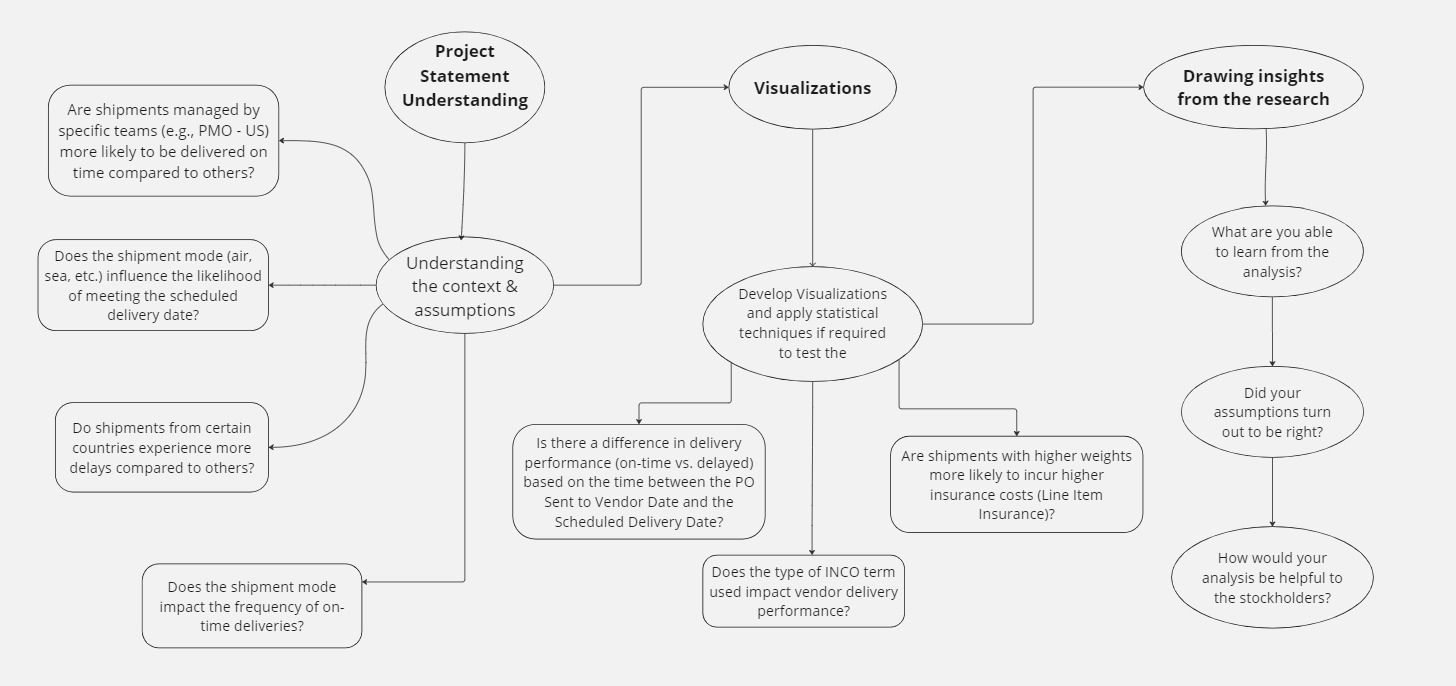

# **Let's Start!**

## Know Your Data

#### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd              # Data manipulation and analysis
import numpy as np               # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns            # Statistical data visualization

#### Load the Data

In [ ]:
fedex="https://raw.githubusercontent.com/manishaachary13/FedEx-Logistics-Performance-Analysis/refs/heads/main/SCMS_Delivery_History_Dataset.csv"

In [ ]:
fedex = pd.read_csv(fedex)

#### Dataset First View

In [ ]:
print(fedex.head())

   ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  ...  \
0   PMO - US  Direct Drop              EXW           Air  ...   
1   PMO - US  Direct Drop              EXW           Air  ...   
2   PMO - US  Direct Drop              FCA           Air  ...   
3   PMO - US  Direct Drop              EXW           Air  ...   
4   PMO - US  Direct Drop              EXW           Air  ...   

  Unit of Measure (Per Pack) Line Item Quantity Line Item Value Pack Price  \
0                         30                 19           551.0      29.00   
1                   

In [ ]:
print(fedex.tail())

          ID Project Code       PQ # PO / SO # ASN/DN #        Country  \
10319  86818   103-ZW-T30  FPQ-15197  SO-50020  DN-4307       Zimbabwe   
10320  86819   104-CI-T30  FPQ-15259  SO-50102  DN-4313  Côte d'Ivoire   
10321  86821   110-ZM-T30  FPQ-14784  SO-49600  DN-4316         Zambia   
10322  86822   200-ZW-T30  FPQ-16523  SO-51680  DN-4334       Zimbabwe   
10323  86823   103-ZW-T30  FPQ-15197  SO-50022  DN-4336       Zimbabwe   

      Managed By Fulfill Via Vendor INCO Term Shipment Mode  ...  \
10319   PMO - US    From RDC   N/A - From RDC         Truck  ...   
10320   PMO - US    From RDC   N/A - From RDC         Truck  ...   
10321   PMO - US    From RDC   N/A - From RDC         Truck  ...   
10322   PMO - US    From RDC   N/A - From RDC         Truck  ...   
10323   PMO - US    From RDC   N/A - From RDC         Truck  ...   

      Unit of Measure (Per Pack) Line Item Quantity Line Item Value  \
10319                         60             166571       599655.60   
1032

#### Dataset Shape

In [ ]:
print(fedex.shape)

(10324, 33)


#### Dataset Info

In [ ]:
print(fedex.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Total Duplicate rows

In [ ]:
print(fedex.duplicated().sum())

0


#### Missing Values

In [ ]:
print(fedex.isnull().sum())

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

### What did you know about your dataset?

* The dataset contains 10,324 rows and 33 columns.
* It appears to be related to supply chain or logistics, specifically for tracking deliveries of pharmaceutical or medical items.
* Data Types:
Numerical:
  - 4 float64, 3 int64

  - Categorical: 26 object

#EDA(Exploratory Data Analysis)

In [ ]:
# Handling Missing Values
df = fedex.assign(
    shipment_mode=fedex['Shipment Mode'].fillna("Unknown"),
    dosage=fedex['Dosage'].fillna("Not Available"),
    line_item_insurance=fedex['Line Item Insurance (USD)'].fillna(0)
)

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,0
